In [1]:
import pandas as pd
taitanic = pd.read_csv('http://bit.ly/kaggletrain')

In [2]:
taitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
taitanic.shape

(891, 12)

In [4]:
taitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Here passenger Id, Name and ticket is not necessary so we are going to remove this
taitanic = taitanic.drop(['PassengerId','Name','Ticket'], axis=1)

In [6]:
taitanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [7]:
# Now checking the  Null Values:-
taitanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# How do we handle these null values?
# We can use classificasion technic to fil these null values
# 1. mean and median 2. removing the particular function and 3. for catagorical data we are using the classification method
taitanic.drop(['Cabin'], axis=1, inplace=True)  

In [9]:
taitanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
# Now checking the  Null Values again:-
taitanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
# Check the Unique values of targeting columns
taitanic['Embarked'].unique() # As We see here are 3 uniqque value so Now we can easily use n_neighbours

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df =  taitanic.drop('Age',axis=1)

In [13]:
df # Checking the dataset for sure

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [14]:
# Befor we shoud Mapping our dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [15]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,S
887,1,1,0,0,0,30.0000,S
888,0,3,0,1,2,23.4500,S
889,1,1,1,0,0,30.0000,C


In [18]:
df['Embarked'] = df['Embarked'].replace('S',3)
df['Embarked'] = df['Embarked'].replace('C',2)
df['Embarked'] = df['Embarked'].replace('Q',1)

In [19]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,3.0
1,1,1,0,1,0,71.2833,2.0
2,1,3,0,0,0,7.9250,3.0
3,1,1,0,1,0,53.1000,3.0
4,0,3,1,0,0,8.0500,3.0
...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,3.0
887,1,1,0,0,0,30.0000,3.0
888,0,3,0,1,2,23.4500,3.0
889,1,1,1,0,0,30.0000,2.0


In [21]:
from sklearn import impute
# Now we are using classification technic on Embarked Columns
from sklearn.impute import KNNImputer # How its Works? => Similiarly, KNN Algorithmn, by K Neighbour or closest of the particular value
imp = KNNImputer(n_neighbors=5) # Before that we should check the Unique values of the working Columns
df = imp.fit_transform(df)

In [22]:
df

array([[ 0.    ,  3.    ,  1.    , ...,  0.    ,  7.25  ,  3.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    , 71.2833,  2.    ],
       [ 1.    ,  3.    ,  0.    , ...,  0.    ,  7.925 ,  3.    ],
       ...,
       [ 0.    ,  3.    ,  0.    , ...,  2.    , 23.45  ,  3.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    , 30.    ,  2.    ],
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  7.75  ,  3.    ]])

In [23]:
# Now converting the array to dataframe
df1 = pd.DataFrame(df)

In [25]:
df1  # As we see here we get the data frame without a column name

,0,1,2,3,4,5,6
0,0.0,3.0,1.0,1.0,0.0,7.2500,3.0
1,1.0,1.0,0.0,1.0,0.0,71.2833,2.0
2,1.0,3.0,0.0,0.0,0.0,7.9250,3.0
3,1.0,1.0,0.0,1.0,0.0,53.1000,3.0
4,0.0,3.0,1.0,0.0,0.0,8.0500,3.0
...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,0.0,0.0,13.0000,3.0
887,1.0,1.0,0.0,0.0,0.0,30.0000,3.0
888,0.0,3.0,0.0,1.0,2.0,23.4500,3.0
889,1.0,1.0,1.0,0.0,0.0,30.0000,2.0


In [26]:
#  Now Lets make the Column name 
df1.columns = ['Survived'	,'Pclass',	'Sex'	,'SibSp',	'Parch',	'Fare',	'Embarked']

In [27]:
# Call the dataset again
df1

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,1.0,0.0,7.2500,3.0
1,1.0,1.0,0.0,1.0,0.0,71.2833,2.0
2,1.0,3.0,0.0,0.0,0.0,7.9250,3.0
3,1.0,1.0,0.0,1.0,0.0,53.1000,3.0
4,0.0,3.0,1.0,0.0,0.0,8.0500,3.0
...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,0.0,0.0,13.0000,3.0
887,1.0,1.0,0.0,0.0,0.0,30.0000,3.0
888,0.0,3.0,0.0,1.0,2.0,23.4500,3.0
889,1.0,1.0,1.0,0.0,0.0,30.0000,2.0


In [29]:
# Now check the dataset again if there is any Null values
df1.isnull().sum()  # We can see taht there is not any null vaalues anymore

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
# Calling the age column as Y
y = taitanic['Age']

In [32]:
y

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [33]:
# Now add the  age column in the dataset
df1['Age'] = y

In [34]:
df1 # Now check the dataset

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0.0,3.0,1.0,1.0,0.0,7.2500,3.0,22.0
1,1.0,1.0,0.0,1.0,0.0,71.2833,2.0,38.0
2,1.0,3.0,0.0,0.0,0.0,7.9250,3.0,26.0
3,1.0,1.0,0.0,1.0,0.0,53.1000,3.0,35.0
4,0.0,3.0,1.0,0.0,0.0,8.0500,3.0,35.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,0.0,0.0,13.0000,3.0,27.0
887,1.0,1.0,0.0,0.0,0.0,30.0000,3.0,19.0
888,0.0,3.0,0.0,1.0,2.0,23.4500,3.0,NaN
889,1.0,1.0,1.0,0.0,0.0,30.0000,2.0,26.0


In [35]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Age         177
dtype: int64

In [36]:
# Now callint the impute to fix the age data

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
it = IterativeImputer()
x = it.fit_transform(df1)

In [37]:
x

array([[ 0.        ,  3.        ,  1.        , ...,  7.25      ,
         3.        , 22.        ],
       [ 1.        ,  1.        ,  0.        , ..., 71.2833    ,
         2.        , 38.        ],
       [ 1.        ,  3.        ,  0.        , ...,  7.925     ,
         3.        , 26.        ],
       ...,
       [ 0.        ,  3.        ,  0.        , ..., 23.45      ,
         3.        , 23.34402981],
       [ 1.        ,  1.        ,  1.        , ..., 30.        ,
         2.        , 26.        ],
       [ 0.        ,  3.        ,  1.        , ...,  7.75      ,
         3.        , 32.        ]])

In [41]:
from pandas.core.frame import DataFrame
df2=DataFrame(x)

In [42]:
df2

,0,1,2,3,4,5,6,7
0,0.0,3.0,1.0,1.0,0.0,7.2500,3.0,22.00000
1,1.0,1.0,0.0,1.0,0.0,71.2833,2.0,38.00000
2,1.0,3.0,0.0,0.0,0.0,7.9250,3.0,26.00000
3,1.0,1.0,0.0,1.0,0.0,53.1000,3.0,35.00000
4,0.0,3.0,1.0,0.0,0.0,8.0500,3.0,35.00000
...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,0.0,0.0,13.0000,3.0,27.00000
887,1.0,1.0,0.0,0.0,0.0,30.0000,3.0,19.00000
888,0.0,3.0,0.0,1.0,2.0,23.4500,3.0,23.34403
889,1.0,1.0,1.0,0.0,0.0,30.0000,2.0,26.00000


In [45]:
#  Now Lets make the Column name 
df2.columns = ['Survived'	,'Pclass',	'Sex'	,'SibSp',	'Parch',	'Fare',	'Embarked','Age']

In [47]:
df2

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0.0,3.0,1.0,1.0,0.0,7.2500,3.0,22.00000
1,1.0,1.0,0.0,1.0,0.0,71.2833,2.0,38.00000
2,1.0,3.0,0.0,0.0,0.0,7.9250,3.0,26.00000
3,1.0,1.0,0.0,1.0,0.0,53.1000,3.0,35.00000
4,0.0,3.0,1.0,0.0,0.0,8.0500,3.0,35.00000
...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,0.0,0.0,13.0000,3.0,27.00000
887,1.0,1.0,0.0,0.0,0.0,30.0000,3.0,19.00000
888,0.0,3.0,0.0,1.0,2.0,23.4500,3.0,23.34403
889,1.0,1.0,1.0,0.0,0.0,30.0000,2.0,26.00000


In [48]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Age         0
dtype: int64

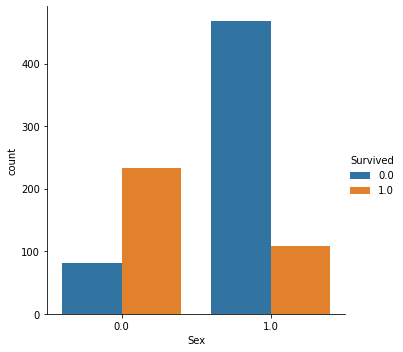

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x='Sex', hue= 'Survived', kind = 'count', data= df2) # To check survaing percentage between men and women

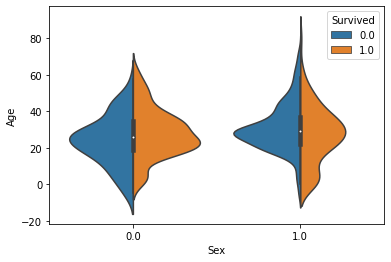

In [51]:
# Now check which age catagorial people are survived most
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df2, split =True)

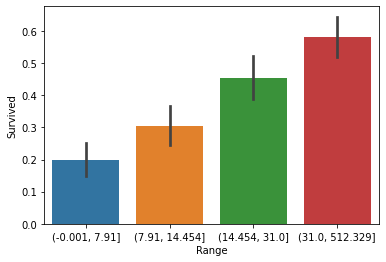

In [54]:
# To check which fare catagory survived more
df2['Range'] = pd.qcut(df2['Fare'],4)
sns.barplot(x = 'Range', y = 'Survived', data = df2)

In [58]:
# Checking the family member
df2['family'] = 0
df2['family'] = df2['Parch']+ df2['SibSp']

In [59]:
# Checking the unique values of family
df2['family'].unique()

array([ 1.,  0.,  4.,  2.,  6.,  5.,  3.,  7., 10.])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


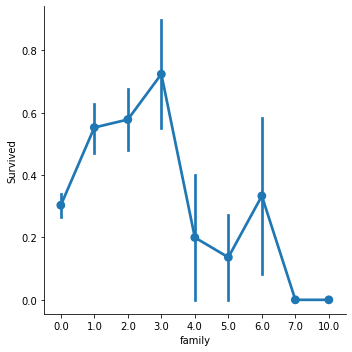

In [60]:
sns.factorplot(x = 'family', y = 'Survived', data = df2)

# Now split the data set into x and y

In [61]:
df2

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age,Range,family
0,0.0,3.0,1.0,1.0,0.0,7.2500,3.0,22.00000,"(-0.001, 7.91]",1.0
1,1.0,1.0,0.0,1.0,0.0,71.2833,2.0,38.00000,"(31.0, 512.329]",1.0
2,1.0,3.0,0.0,0.0,0.0,7.9250,3.0,26.00000,"(7.91, 14.454]",0.0
3,1.0,1.0,0.0,1.0,0.0,53.1000,3.0,35.00000,"(31.0, 512.329]",1.0
4,0.0,3.0,1.0,0.0,0.0,8.0500,3.0,35.00000,"(7.91, 14.454]",0.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,0.0,0.0,13.0000,3.0,27.00000,"(7.91, 14.454]",0.0
887,1.0,1.0,0.0,0.0,0.0,30.0000,3.0,19.00000,"(14.454, 31.0]",0.0
888,0.0,3.0,0.0,1.0,2.0,23.4500,3.0,23.34403,"(14.454, 31.0]",3.0
889,1.0,1.0,1.0,0.0,0.0,30.0000,2.0,26.00000,"(14.454, 31.0]",0.0


In [67]:
x= df2.iloc[:,1:7]
x

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3.0,1.0,1.0,0.0,7.2500,3.0
1,1.0,0.0,1.0,0.0,71.2833,2.0
2,3.0,0.0,0.0,0.0,7.9250,3.0
3,1.0,0.0,1.0,0.0,53.1000,3.0
4,3.0,1.0,0.0,0.0,8.0500,3.0
...,...,...,...,...,...,...
886,2.0,1.0,0.0,0.0,13.0000,3.0
887,1.0,0.0,0.0,0.0,30.0000,3.0
888,3.0,0.0,1.0,2.0,23.4500,3.0
889,1.0,1.0,0.0,0.0,30.0000,2.0


In [69]:
y = df2.iloc[:,0]
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

# Now Let's use the machine learning Model

In [71]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [72]:
lr.score(x,y)

0.7957351290684624

In [74]:
# Naive Bayas Multinomial
from sklearn.naive_bayes import MultinomialNB
multiNB = MultinomialNB()
multiNB.fit(x,y)
pred = multiNB.predict(x)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y,pred)

0.6947250280583613

In [78]:
# Naive bayas GaussianNb
from sklearn.naive_bayes import GaussianNB
gussNB = GaussianNB()
gussNB.fit(x,y)
pred_g = gussNB.predict(x)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y,pred_g)

0.7912457912457912

In [81]:
# DecisionTreeClassifier Algorithmn
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x,y)
pred = dc.predict(x)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y,pred)

0.9248035914702581

In [84]:
# Now Let's check the SVM
from sklearn.svm import SVC # By deafult its a Radial 
svm = SVC()
svm.fit(x,y)
pred = svm.predict(x)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y,pred)

0.6801346801346801

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x,y)
pred = knn.predict(x)

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y,pred)

0.8294051627384961